### Linear Search

Linear search looks for each element in the list or array until it finds the key value. In worst case scenario the key could be present at the end of the list and it visits each element to find the key.

In [5]:
def linear_search(A, key):
    for elm in A:
        if key == elm:
            return i
    return None

In [8]:
A = [3,4,1,7,9,20,45,1,23]

In [9]:
key = int(input("Enter the key to search: "))
pos = linear_search(A, key)
if pos is not None:
    print(f"key found at position: {pos}")

Enter the key to search: 45
key found at position: 6


In [19]:
import numpy as np

A = np.arange(1000)
key = 999

B = np.arange(100000)
key_2 = 99999

In [20]:
%%timeit
linear_search(A, key)

216 µs ± 4.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%%timeit
linear_search(B, key_2)

22.1 ms ± 799 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Time scales linearly with n.<br>
Big-O is $O(n)$

### Binary Search

Binary search looks for the middle element of the list and checks it against key, if the key is found, great otherwsie
we check if the key is smaller than middle value or greater than it. It looks in the first half if key is smaller than middle value otherwise it looks to the right. One main pre-requisite for this algorithm is that it expects the list to be sorted.

In [38]:
def binary_search(A, key):
    low = 0
    high = len(A)
    while low>=high:
        mid = (low+high)//2
        if key == A[mid]:
            return True
        elif key < A[mid]:
            high = mid-1
        elif key > A[mid]:
            low = mid+1
    return False

In [42]:
A = np.arange(100000)

In [43]:
%%timeit
binary_search(A, 99999)

156 ns ± 2.45 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [44]:
%%timeit
binary_search(A, 99)

156 ns ± 0.82 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Binary Search performs faster than linear search

In [32]:
def binary_search_recursive(A, key):
    low = 0
    high = len(A)
    if high>=0:
        mid = (low+high)//2
        if key == A[mid]:
            return True
        elif key < A[mid]:
            return binary_search_recursive(A[:mid], key)
        elif key > A[mid]:
            return binary_search_recursive(A[mid:], key)
    return False

In [33]:
A = np.arange(10000)

In [35]:
%%timeit
binary_search_recursive(A, 87)

8.23 µs ± 145 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [36]:
%%timeit
binary_search_recursive(A, 99)

10.9 µs ± 450 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Rabin-Karp hash search

In [2]:
doc = """Porchetta food truck Roli Roti and the Mission’s Dynamo Donut
are teaming up once again on a one-day-only donut porchetta sandwich,
which is exactly what it sounds like. The donuts serving as bread are
flavored with onion and thyme, holding juicy slices of porchetta straight
from the rotisserie."""

In [4]:
# 1st implementation : slow
def hash(string):
    return sum(ord(char) for char in string)

def search(doc, string):
    n = len(doc)
    m = len(string)
    hsh = hash(string)
    
    for i in range(n-m+1):
        hdoc = hash(doc[i:i+m])
        if hsh == hdoc and string == doc[i:i+m]:
            return i
    return -1

In [7]:
search(doc, 'food'), search(doc,'Roli Roti')

(10, 21)

In [11]:
# 2nd implementation : fast
def hash2(string, n):
    # find hash only for n characters in string
    return sum(ord(string[i]) for i in range(n))

def search2(doc, string):
    n = len(doc)
    m = len(string)
    
    hs = hash2(string,m)
    hdoc = hash2(doc,m)
    
    for i in range(n-m+1):
        if hdoc==hs and string==doc[i:i+m]:
            return i
        # rolling hash
        next = ord(doc[i+m]) if i+m<n else 0
        hdoc = hdoc - ord(doc[i]) + next
    return -1

In [12]:
search2(doc, 'food'), search2(doc,'Roli Roti')

(10, 21)

### Tries

In [19]:
from lolviz import *

In [13]:
# dictionary implementation of the TrieNode
class TrieNode:
    def __init__(self):
        self.edges = {}
    

In [24]:
def add(p, string, idx=0):
    if idx >= len(string): return
    if string[idx] not in p.edges:
        p.edges[string[idx]]=TrieNode()
    add(p.edges[string[idx]], string, idx+1)

In [25]:
root = TrieNode()
add(root, 'a')

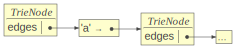

In [27]:
objviz(root)

In [28]:
add(root, 'ape')
add(root, 'apple')
add(root, 'cat')

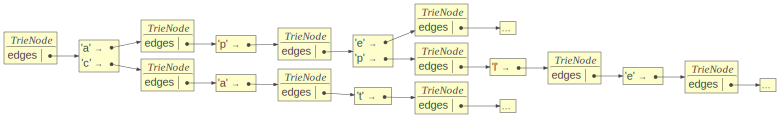

In [30]:
objviz(root)

In [31]:
root.edges

{'a': <__main__.TrieNode at 0x10642db70>,
 'c': <__main__.TrieNode at 0x10643d128>}

In [34]:
def search(root, string, idx=0):
    p = root
    while p is not None:
        if idx >= len(string): return True
        if string[idx] not in p.edges: return False
        p = p.edges[string[idx]]  # point to next Trienode
        idx += 1
    return True

In [36]:
search(root, "apple"), search(root, "dog"), search(root, "cat")

(True, False, True)

### Fast dictionary implementation

In [37]:
class TrieNode:
    def __init__(self):
        self.edges = []
        for c in range(ord('a'), ord('z')+1): # 26 edges
            self.edges.append(None)

In [38]:
def add(p, s, i=0):
    if i>=len(s): return
    
    e = ord(s[i]) - ord('a')
    if p.edges[e] is None:
        p.edges[e] = TrieNode()
    
    add(p.edges[e], s, i+1)

In [39]:
def search(root, s, i=0):
    "Return true if s is prefix of word in Trie or full word in Trie"
    p = root
    while p is not None:
        if i>=len(s): return True
        
        e = ord(s[i]) - ord('a')
        if p.edges[e] is None: return False
        p = p.edges[e]
        i += 1
    return True

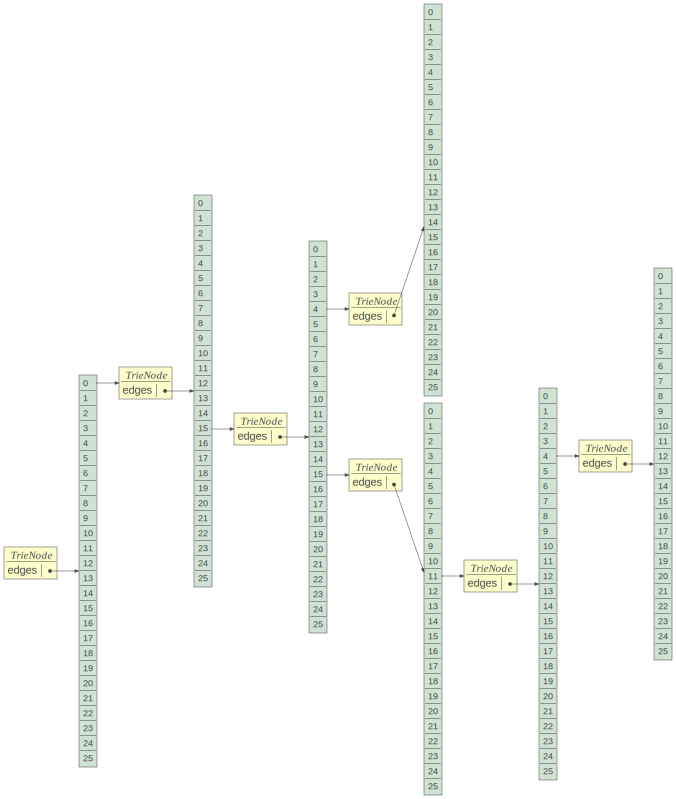

In [40]:
root = TrieNode()
add(root, "ape")
add(root, "apple")
objviz(root)

In [41]:
search(root, "apple"), search(root, "appl"), search(root, "ape"), search(root, "apf")

(True, True, True, False)